https://www.tensorflow.org/tutorials/keras/basic_classification

## Import dependencies

In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print("Tensorflow version : " + tf.__version__)

Tensorflow version : 1.11.0


## Download fashion MNIST dataset

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Each image is mapped to a single label. Since the class names are not included with the dataset, store them here to use later when plotting the images:

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore datas

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
len(train_labels)

60000

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
len(test_labels)

10000

## Preprocess datas

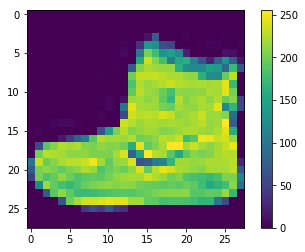

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

## Convert the samples from integers to floating-point numbers:
We scale these values to a range of 0 to 1 before feeding to the neural network model. For this, cast the datatype of the image components from an integer to a float, and divide by 255. Here's the function to preprocess the images:

In [12]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [13]:
print(train_images.shape)
print(len(test_images))

(60000, 28, 28)
10000


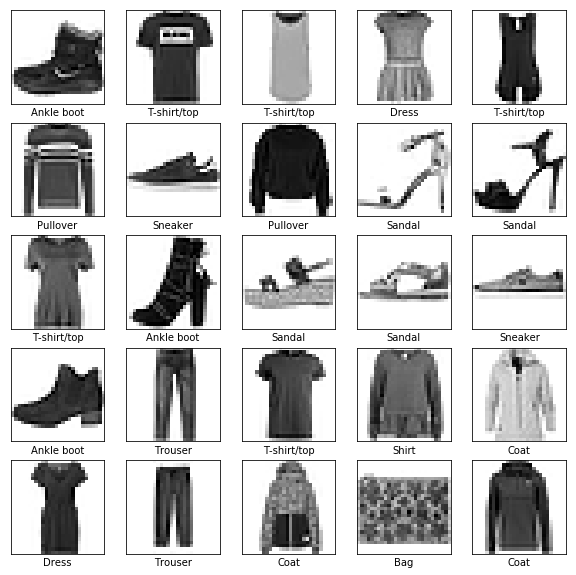

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

## Build the model

### Setup layers

In [45]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)
model.summary()

Epoch 1/5
60000/60000 [==============================] - 3s 51us/step - loss: 0.5005 - acc: 0.8241
Epoch 2/5
60000/60000 [==============================] - 3s 50us/step - loss: 0.3780 - acc: 0.8634
Epoch 3/5
60000/60000 [==============================] - 3s 49us/step - loss: 0.3404 - acc: 0.8766
Epoch 4/5
60000/60000 [==============================] - 3s 49us/step - loss: 0.3143 - acc: 0.8861
Epoch 5/5
60000/60000 [==============================] - 3s 50us/step - loss: 0.2977 - acc: 0.8901
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101

## Evaluate accuracy

In [44]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

10000/10000 [==============================] - 0s 48us/step
('Test accuracy:', 0.8614)
('Test loss:', 0.38098993985652924)


## Make predictions on all dataset

In [21]:
predictions = model.predict(test_images)

In [22]:
predictions[0]

array([1.3592475e-05, 1.2342679e-06, 7.9522692e-07, 3.4961931e-10,
       2.3843584e-06, 1.8623868e-02, 1.2996750e-05, 4.3658894e-02,
       1.2014842e-06, 9.3768501e-01], dtype=float32)

In [31]:
np.argmax(predictions[0])

9

In [23]:
test_labels[0]

9

## Predict preview first 10 images

In [26]:
for index, prediction in enumerate(predictions):
    
    if index > 10:
        break
        
    prediction = np.argmax(prediction)
    test = test_labels[index]
    assertion = prediction == test
    
    #if assertion == False:
    print(str(index) + " : " + str(prediction) + " => " + str(test) + " => " + str(assertion))
    

0 : 9 => 9 => True
1 : 2 => 2 => True
2 : 1 => 1 => True
3 : 1 => 1 => True
4 : 6 => 6 => True
5 : 1 => 1 => True
6 : 4 => 4 => True
7 : 6 => 6 => True
8 : 5 => 5 => True
9 : 7 => 7 => True
10 : 4 => 4 => True


## Use the trained model to make a prediction about a single image.

In [32]:
# Grab an image from the test dataset
test_image = test_images[0]

print(test_image.shape)

(28, 28)


In [33]:
# Add the image to a batch where it's the only member.
test_image = (np.expand_dims(test_image,0))

print(test_image.shape)

(1, 28, 28)


In [34]:
predictions_single = model.predict(test_image)

print(predictions_single)

[[1.3592501e-05 1.2342679e-06 7.9522619e-07 3.4962064e-10 2.3843606e-06
  1.8623842e-02 1.2996750e-05 4.3658882e-02 1.2014820e-06 9.3768501e-01]]


In [30]:
np.argmax(predictions_single[0])

9

## Plot predictions

### Def functions to plot results

In [36]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Let's look at the 0th image, predictions, and prediction array.

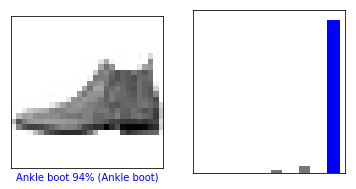

In [37]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

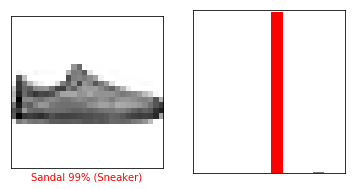

In [38]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

Let's plot several images with their predictions. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percent (out of 100) for the predicted label. Note that it can be wrong even when very confident.

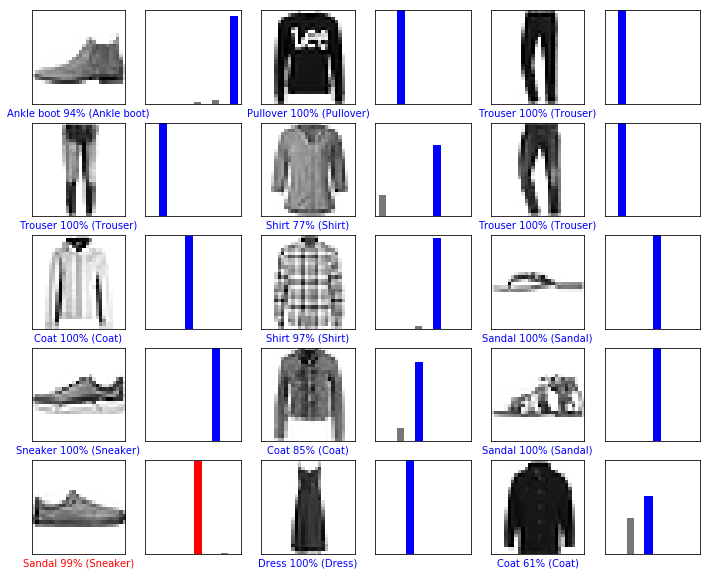

In [39]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)